# 🧠 Predicting Student Final Grades with SVR

This project aims to predict students' final grades using **Support Vector Regression (SVR)** and compare it with **Linear Regression**. We'll use the UCI Student Performance dataset, which includes demographic, social, and academic features.

## 📦 Step 1: Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

## 📥 Step 2: Load Dataset

In [7]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-mat.csv",
    sep=";"
)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 🔍 Step 3: Explore Dataset

In [8]:
df.shape, df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

((395, 33),
 None,
               age        Medu        Fedu  traveltime   studytime    failures  \
 count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
 mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
 std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
 min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
 25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
 50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
 75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
 max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   
 
            famrel    freetime       goout        Dalc        Walc      health  \
 count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
 mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.55443

## 📊 Step 4: Exploratory Data Analysis (EDA)

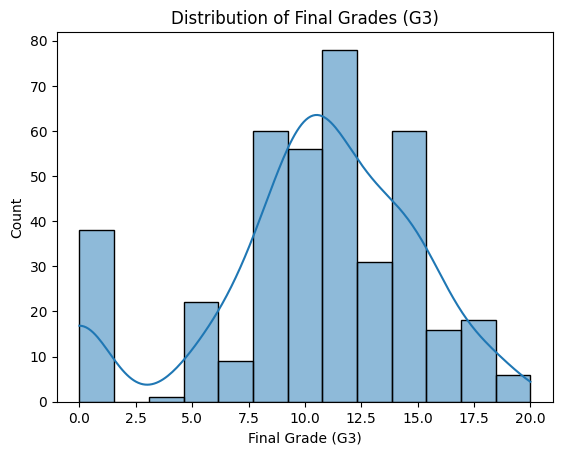

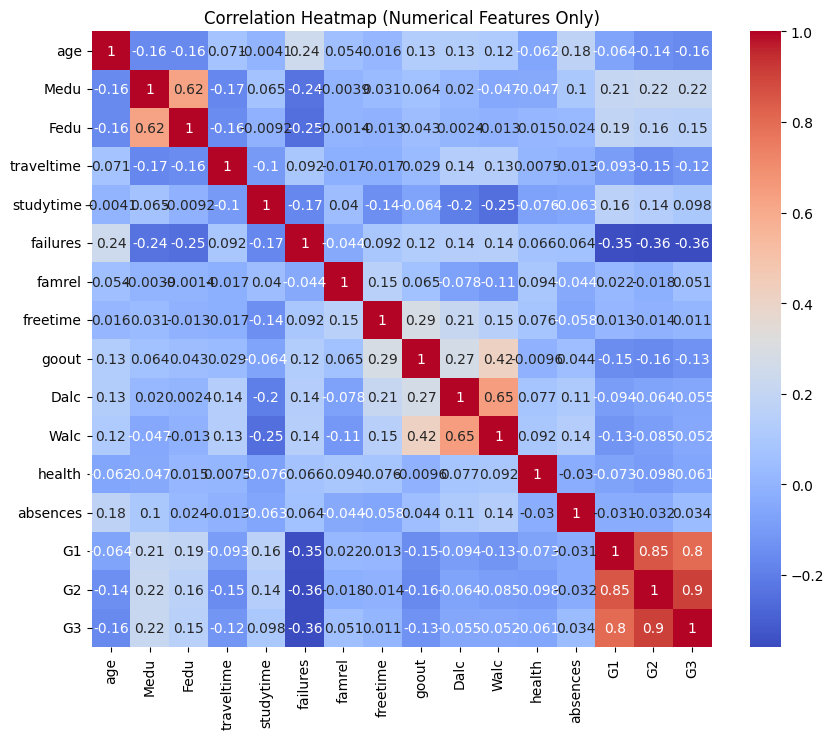

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of final grades (G3)
sns.histplot(df['G3'], kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Count')
plt.show()

# Plot correlation heatmap for numeric features only
numeric_df = df.select_dtypes(include='number')  # Select numeric columns only

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Features Only)')
plt.show()


## 🧼 Step 5: Preprocessing

In [11]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Features and target
X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 🧪 Step 6: Train-Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 🧠 Step 7: Train the Models

In [13]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# SVR
svr_model = SVR(kernel='rbf', C=100, epsilon=0.2)
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

## ✅ Step 8: Evaluate the Models

In [14]:
def evaluate_model(y_true, y_pred, name):
    print(f"--- {name} ---")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²:", r2_score(y_true, y_pred))
    print()

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_svr, "Support Vector Regression")

--- Linear Regression ---
MAE: 1.6466656197147493
MSE: 5.656642833231218
RMSE: 2.378369784796136
R²: 0.7241341236974024

--- Support Vector Regression ---
MAE: 1.983745874023056
MSE: 6.799322202571681
RMSE: 2.607550997118116
R²: 0.6684073870358371



## 🔮 Step 11: Predict on New Data

In [15]:
# Predict with dummy input (just for demo)
sample_input = X_test[0].reshape(1, -1)
svr_model.predict(sample_input)

array([5.99119902])

## 💬 Final Summary

- SVR handled the nonlinear patterns in data better than Linear Regression for this task.
- The feature distribution and preprocessing were critical in boosting performance.
- Next time, I’ll explore GridSearchCV for tuning SVR hyperparameters like `C` and `gamma`.